# Voter Registration During the Pandemic

DiDa 325: Midterm

Author: Leah Chow

This notebook investigates data of how many people registered to vote in early 2016 and early 2020 in 11 states and Washington D.C. You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Dataframe link [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv)

Please read more about the data set [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration) and the article [here](https://fivethirtyeight.com/features/voter-registrations-are-way-way-down-during-the-pandemic/)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Let's load in the dataframe:

In [3]:
vote = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction



The purpose of my project is to investigate how new voter registeration in the United States has flucuated between 2016 and 2020 and what external factors can be attributed to the changes. The goal is to show how external situations can contribute to someone registering to vote such as the COVID-19 pandemic. It is important for someone to read this notebook because this project can help you to understand the broader societal and political implications of events that may affect democratic participation. This analysis can shed light on how crises or major events impact civic engagement, highlighting the need for policies that address such disruptions and ensure that all eligible voters can exercise their right to vote regardless of external circumstances.

Research questions I want to investigate:
1. How does COVID-19 affect voter registration in 2020?
2. How have new voter registrations in California fluctuated between early 2016 and early 2020?

## Data Processing

This is what the dataset looks like:

In [4]:
vote.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


**Jurisdiction** represents the state name

**Year** is the election year, either 2016 or 2020

**Month** is the month the new voter registered

**New registered voters** are the number of people that newly registered to vote in that month

Checking for any missing data and dropping the NAs:

In [5]:
vote.isna()

,Jurisdiction,Year,Month,New registered voters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
101,False,False,False,False
102,False,False,False,False
103,False,False,False,False
104,False,False,False,False


In [6]:
vote.dropna()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Checking for the data types:

In [9]:
vote.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Renaming the columns to easier names to use for throughout the rest of the notebook:

In [10]:
vote=vote.rename(columns={"Jurisdiction":"NAME", "New registered voters":"registered_voters"})

## Some potential limitations with the data:
We only have the data for 11 states and Washington DC and limits the scope of conclusions we can make.
The data is only accounted for the first half of the election years so we are limited in data from the rest of the year.
The dataset also has contextual limitations because it does not account for external factors like data collection methods that can influence voter registerations

## Exploratory Data Analysis:

## When was the highest amount of new voter registration?


In [11]:
vote["registered_voters"].max()

238281

In [12]:
vote.loc[vote.registered_voters==238281]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of new voter registration was Feburary 2020 in California with 238,281 registrations.

## What is the average voter registration?

In [13]:
avg_vote = vote["registered_voters"].mean()
avg_vote

48223.46226415094

The average voter registration is 48223 registerations rounded to the whole number.

## How many times was voter registration higher than the above average?


In [15]:
high_voters = vote.loc[vote.registered_voters>=48223]
high_voters.count()

,0
NAME,36
Year,36
Month,36
registered_voters,36


There are 36 instances when voter registration was higher than average

## How many times did each state go above the national average for new voter registration?



In [17]:
vote["high_voters"] = vote["registered_voters"] > 48223
result = vote.groupby("NAME")["high_voters"].sum().reset_index()

print(result.sort_values(by="high_voters", ascending=False))

                    NAME  high_voters
10                 Texas            8
1             California            7
5                Florida            7
9         North Carolina            6
7               Illinois            4
0                Arizona            3
6                Georgia            1
2               Colorado            0
3               Delaware            0
4   District of Columbia            0
8               Maryland            0
11              Virginia            0


## Which three states had the highest average voter registration overall?

In [ ]:
print(result.sort_values(by="high_voters", ascending=False).head(3))

          NAME  high_voters
10       Texas            8
1   California            7
5      Florida            7


Texas, California, and Florida have the highest average voter registeration overall.

#Data Visualization

Creating a bar plot showing the voter registration by state:


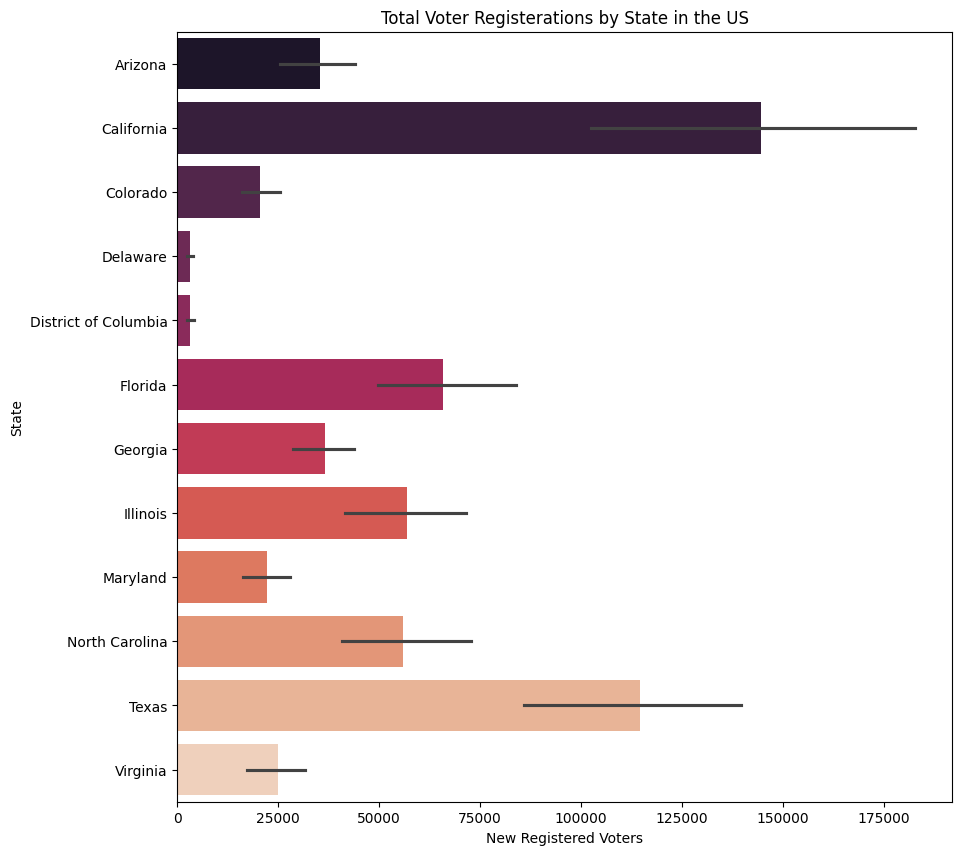

In [18]:
plt.figure(figsize=(10, 10))
sns.barplot(vote,x="registered_voters", y="NAME", hue="NAME", palette="rocket")
plt.xlabel("New Registered Voters")
plt.ylabel("State")
plt.title("Total Voter Registerations by State in the US")
plt.show()

In this visualization, you can see that California and Texas has the highest total voter registeration out of the other states. This result can be contributed to the fact that California and Texas both have large populations. Colorado, Delaware and District of Columbia have the lowest voter registeration. This can also be contributed to the lower population in those states.

Creating a bar plot comparing voter registation in 2016 vs 2020.

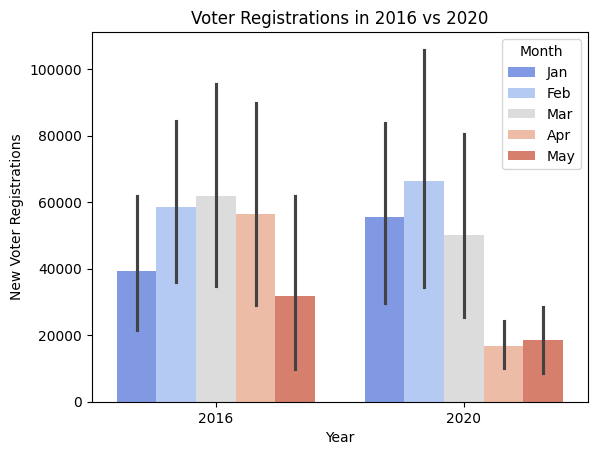

In [19]:
sns.barplot(vote, x="Year", y="registered_voters", hue="Month", palette="coolwarm")
plt.xlabel("Year")
plt.ylabel("New Voter Registrations")
plt.title("Voter Registrations in 2016 vs 2020")
plt.legend(title="Month")
plt.show()

The month of Feburary for both 2016 and 2020 has the overall highest voter registration. For both election years, there is an positive increase peaking in Feburary and March and a decline in April and May. In 2020, there is a sharp decrease in April, particularly due to the external factor of the COVID-19 pandemic and the limitations of registration because of social distancing. Additionally, there is a higher increase in registeration in the beginning of 2020 compared to 2016 despite the drop off in 2020.

Creating a visualization that investigates the affect of the COVID-19 pandemic during voter registration in early 2020:

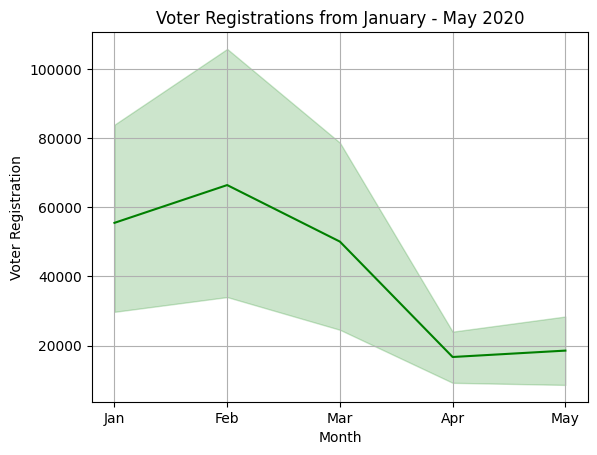

In [20]:
vote_2020 = vote[(vote["Year"] == 2020)]

sns.lineplot(vote_2020, x="Month", y="registered_voters", color="green")
plt.title("Voter Registrations from January - May 2020")
plt.xlabel("Month")
plt.ylabel("Voter Registration")
plt.grid()
plt.show()

In this visualization, I'm investigating the affect of the voter registation trend during the start of the COVID-19 pandemic in March 2020. With the line plot, you can see a sharp decrease in registration from March to April and how the pandemic affected the accessiblity to register to vote in 2020.

# Mapping

In [21]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [22]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

Setting our continental US bounding box:

<Axes: >

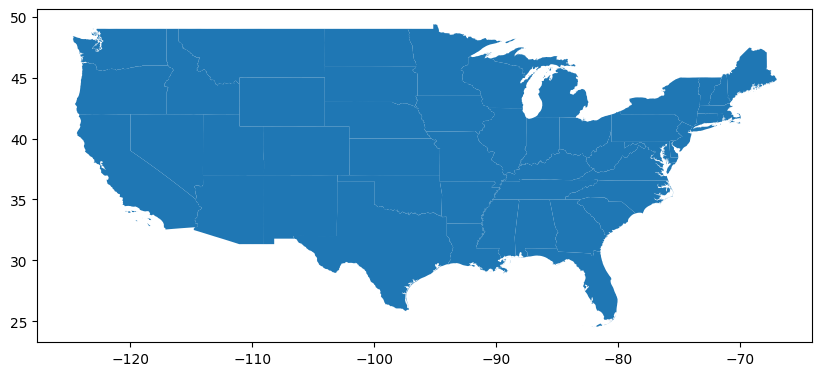

In [23]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))

Creating a dataframe that shows the average voter registration per state:

In [25]:
avg_reg_per_state = vote.groupby("NAME")["registered_voters"].mean().reset_index()

avg_per_state = avg_reg_per_state.sort_values(by="registered_voters")
avg_per_state

,NAME,registered_voters
3,Delaware,3166.375
4,District of Columbia,3248.400
2,Colorado,20527.500
8,Maryland,22133.500
11,Virginia,24845.200
0,Arizona,35311.500
6,Georgia,36604.125
9,North Carolina,56040.800
7,Illinois,56840.375
5,Florida,65868.125


Merging the above datafram with the mapping data:

In [26]:
bbox.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [27]:
avg_per_state.columns

Index(['NAME', 'registered_voters'], dtype='object')

In [28]:
vote_map= bbox.merge(avg_per_state, on="NAME", how="left")

This is what the new merged dataframe looks like:

In [29]:
vote_map.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",NaN
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.8
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",NaN
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.2
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",NaN


Making a map that displays the states we have the voter registration information for on a US map:


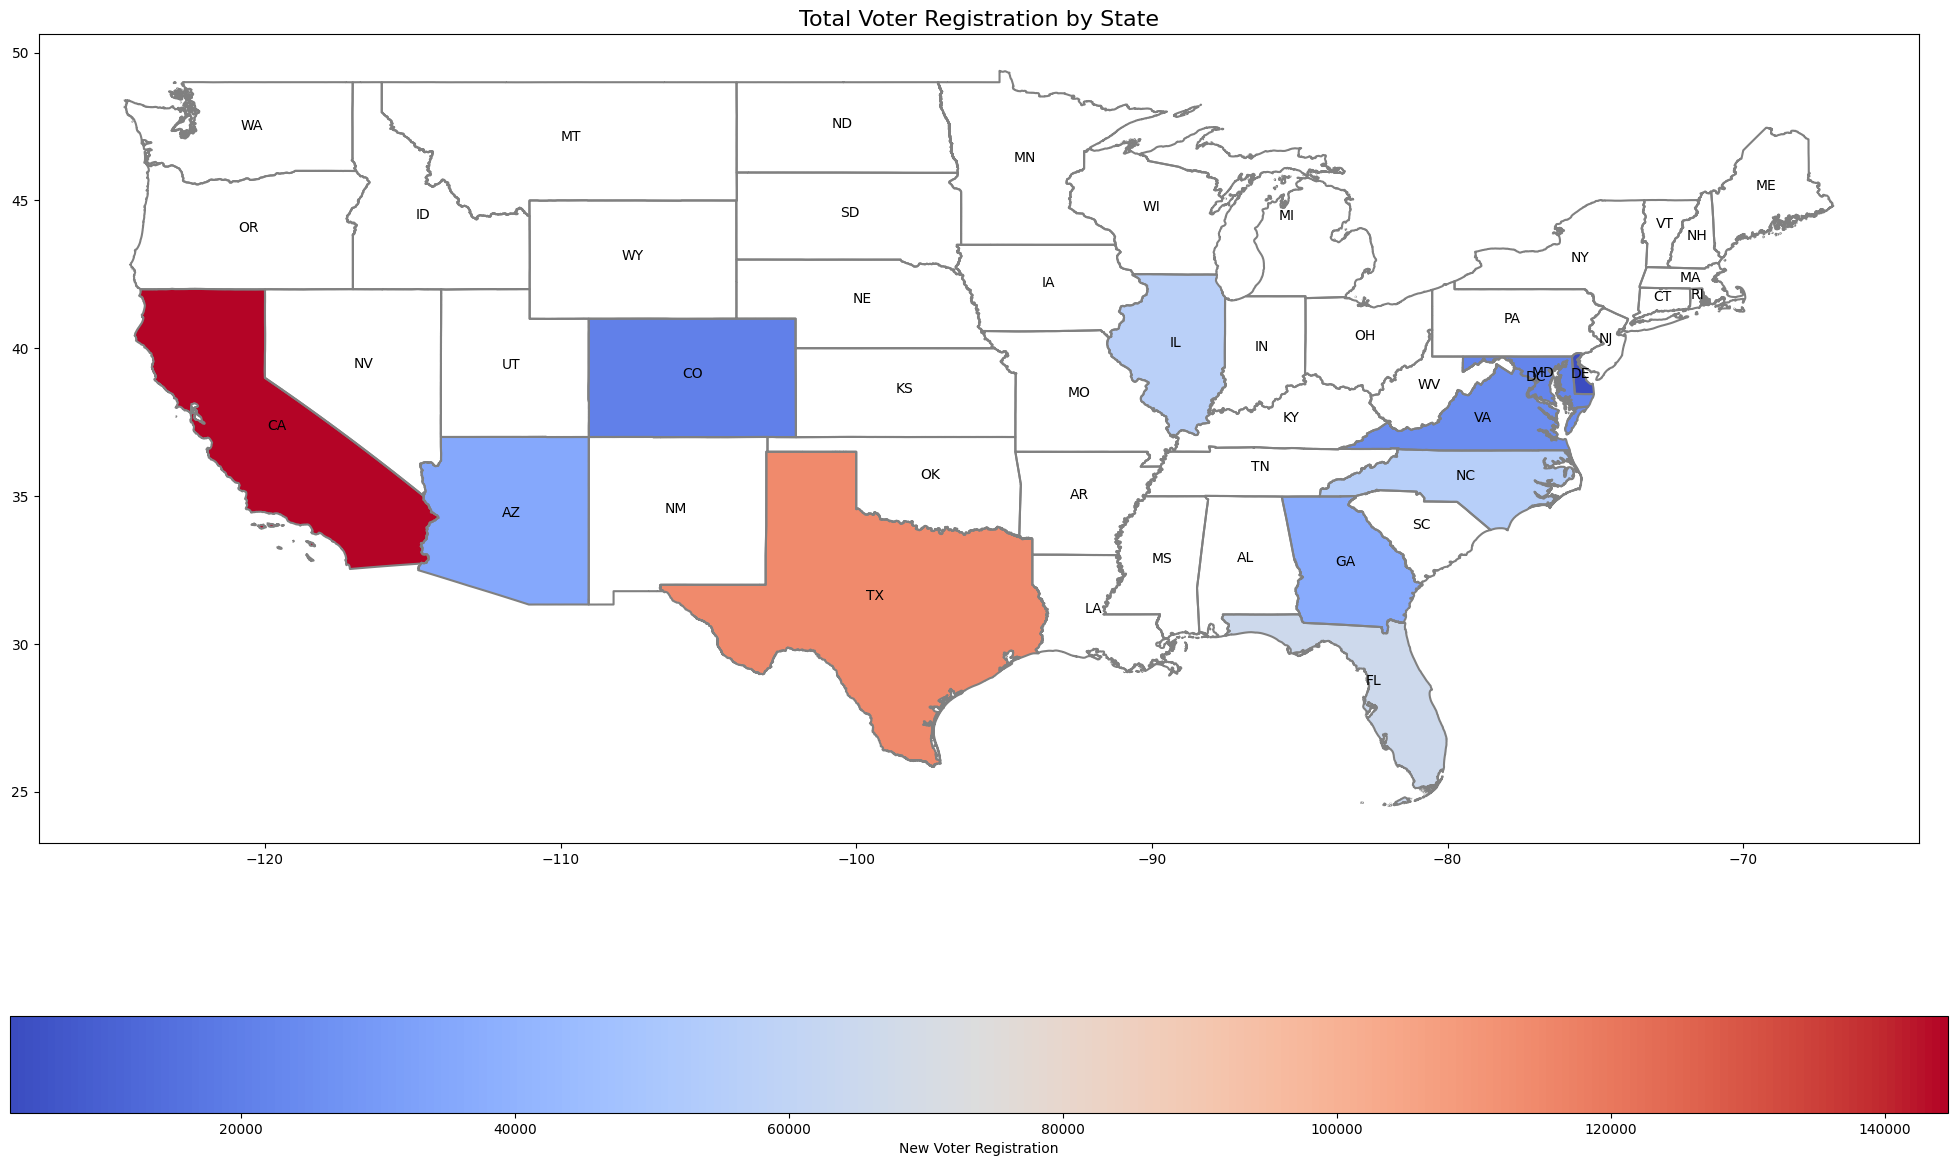

In [30]:
us_map=bbox.boundary.plot(figsize=(25,15),color="gray")
vote_map.plot(column="registered_voters",ax=us_map, legend=True,cmap="coolwarm",
            legend_kwds={"label": "New Voter Registration",
            "orientation": "horizontal"})
vote_map.apply(lambda x: us_map.annotate(text=x.STUSPS,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=10),axis=1)
plt.title("Total Voter Registration by State", fontsize=16)
plt.show()

From the color legend, you can determine that California and Texas had the highest total voter registration and Colorado, Delaware, and District of Columbia had the lowest from early 2016 and early 2020.

# Conclusion


From my analysis, I found that California had the highest voter registration in this dataset. Furthermore, the COVID-19 pandemic had a noticeable negative impact on voter registration, with a sharp decrease between March and April 2020. This decline suggests that external events, like a global health crisis, can significantly disrupt voter registration trends. Additionally, I identified that various external factors, such as economic, political, and social circumstances, play a crucial role in shaping voter behavior and registration patterns, which must be considered when analyzing these data.

For more accurate and comprehensive analysis, I recommend expanding the dataset to include all 50 states, as this would minimize biases that arise from the limited scope of the current data. It would also be beneficial to include additional demographic factors, such as gender, age, or race, to provide a deeper understanding of voter registration trends. I suggest extending the dataset to cover all months of the year, not just the first few months, in order to capture seasonal or event-driven fluctuations more effectively. This will provide a fuller picture of how voter registration evolves over time.

As the next step in this project, I would compare voter registration data for individual states from 2016 to 2020 to examine changes across election years. By analyzing the states with the highest and lowest voter registrations, I can explore potential correlations between registration rates, months, and election cycles. Additionally, I plan to create a map comparing voter registration in 2016 and 2020 to visually identify any significant shifts in voter engagement.